<a href="https://colab.research.google.com/github/pawelnowicki87/2048_game/blob/master/Kopia_notatnika_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏠 Predykcja cen mieszkań – projekt zaliczeniowy

## 📦 1. Import bibliotek


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")


## 📂 2. Wczytanie danych


In [ ]:
# Wczytanie zbioru California Housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Podgląd danych
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 🔍 3. Eksploracja danych (EDA)


In [ ]:
# Podstawowe informacje o danych
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Statystyki opisowe
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# Sprawdzenie braków
df.isnull().sum()


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


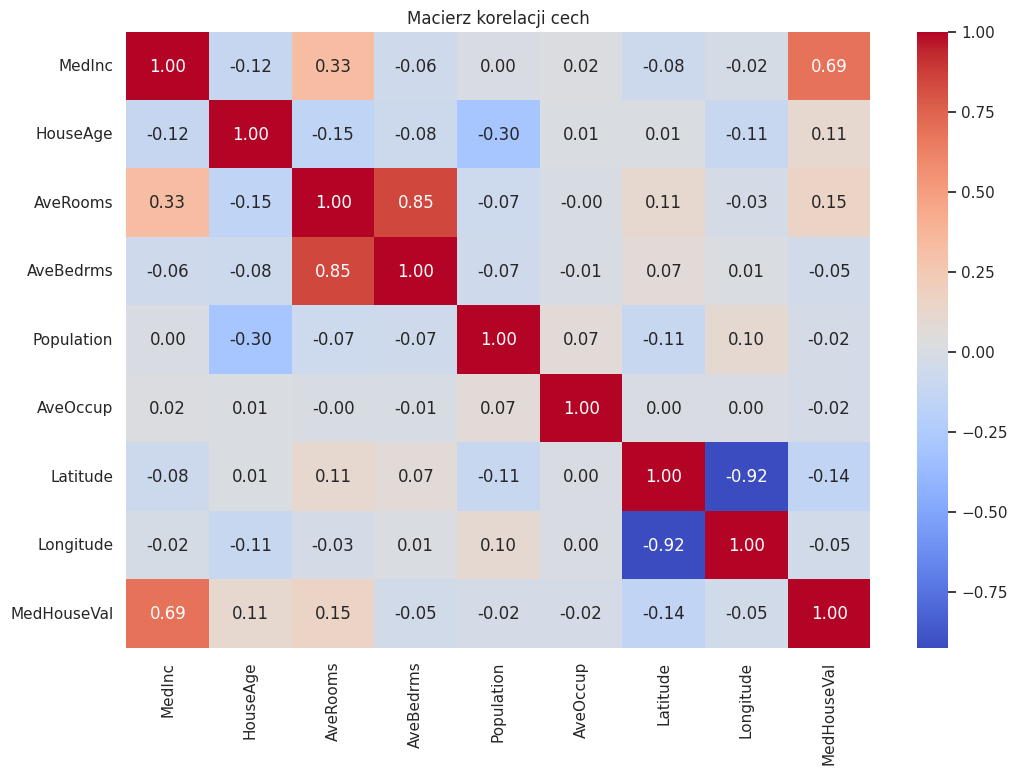

In [ ]:
# Korelacje i heatmapa
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Macierz korelacji cech")
plt.show()


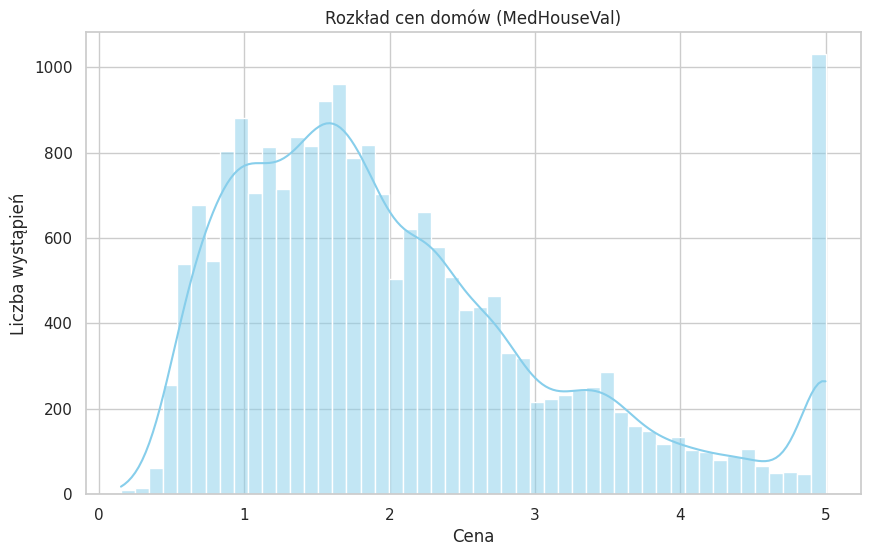

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], bins=50, kde=True, color='skyblue')
plt.title("Rozkład cen domów (MedHouseVal)")
plt.xlabel("Cena")
plt.ylabel("Liczba wystąpień")
plt.show()


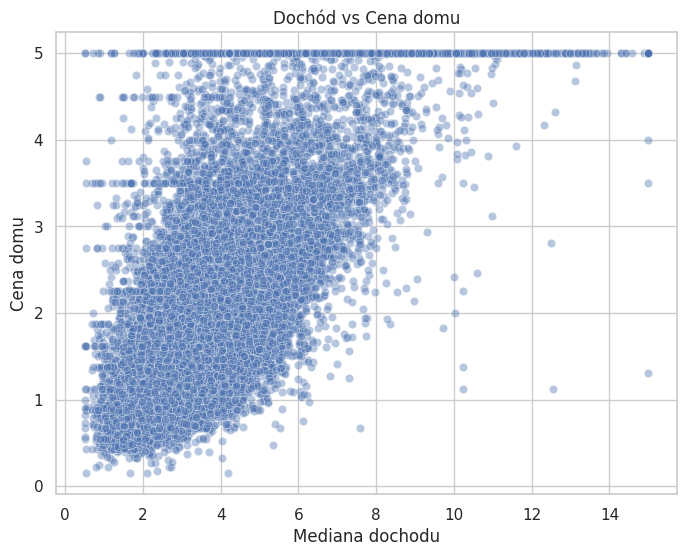

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.4)
plt.title("Dochód vs Cena domu")
plt.xlabel("Mediana dochodu")
plt.ylabel("Cena domu")
plt.show()


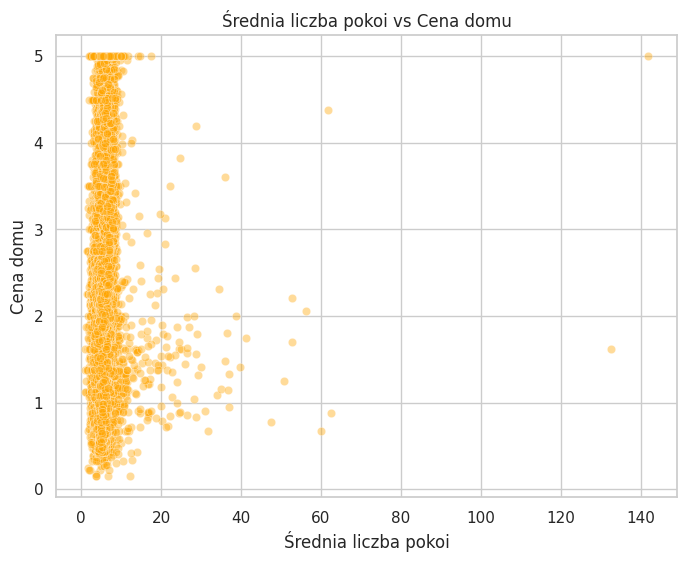

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=df, alpha=0.4, color='orange')
plt.title("Średnia liczba pokoi vs Cena domu")
plt.xlabel("Średnia liczba pokoi")
plt.ylabel("Cena domu")
plt.show()


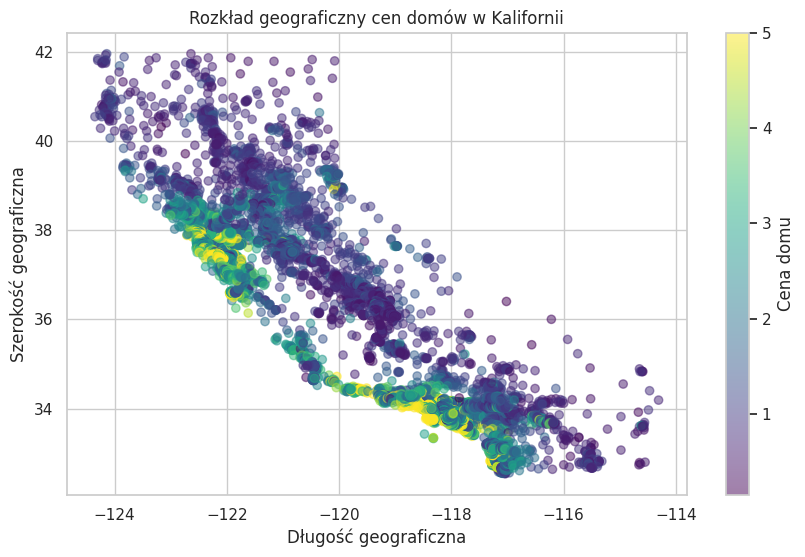

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['MedHouseVal'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Cena domu')
plt.xlabel("Długość geograficzna")
plt.ylabel("Szerokość geograficzna")
plt.title("Rozkład geograficzny cen domów w Kalifornii")
plt.show()


## 🧼 4. Przygotowanie danych


In [ ]:
# Zmienna objaśniana (target)
y = df['MedHouseVal']

# Zmienne objaśniające (cechy)
X = df.drop(columns=['MedHouseVal'])


In [ ]:
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## ⚙️ 5. Trenowanie modeli


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


## 📊 6. Ocena modeli


In [ ]:
print("Regresja Liniowa:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2:", r2_score(y_test, y_pred_lr))


Regresja Liniowa:
MAE: 0.5332001304956553
MSE: 0.5558915986952444
R2: 0.5757877060324508


In [ ]:
print("Random Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))


Random Forest:
MAE: 0.32754256845930246
MSE: 0.2553684927247781
R2: 0.8051230593157366


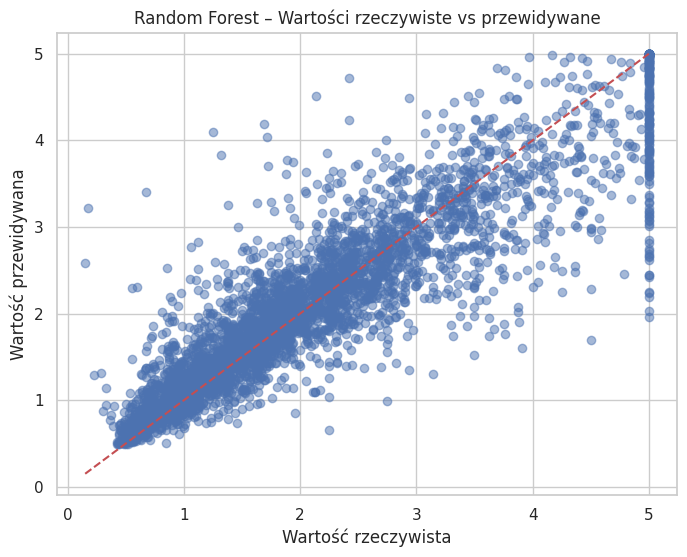

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Wartość rzeczywista")
plt.ylabel("Wartość przewidywana")
plt.title("Random Forest – Wartości rzeczywiste vs przewidywane")
plt.show()


## 🧠 7. Wnioski końcowe


🧠 Wnioski końcowe
Random Forest uzyskał lepsze wyniki niż regresja liniowa (niższe MAE, MSE, wyższe R²).
Najbardziej wpływowe cechy to: MedInc, AveRooms, HouseAge.
Model może być wykorzystywany jako wsparcie do wyceny mieszkań.
✅ Projekt zrealizowany w Colab z użyciem zbioru California Housing.

## 🌲 Feature Importance – Random Forest


<ipython-input-28-0a6e1ca3dae8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Ważność', y='Cecha', palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


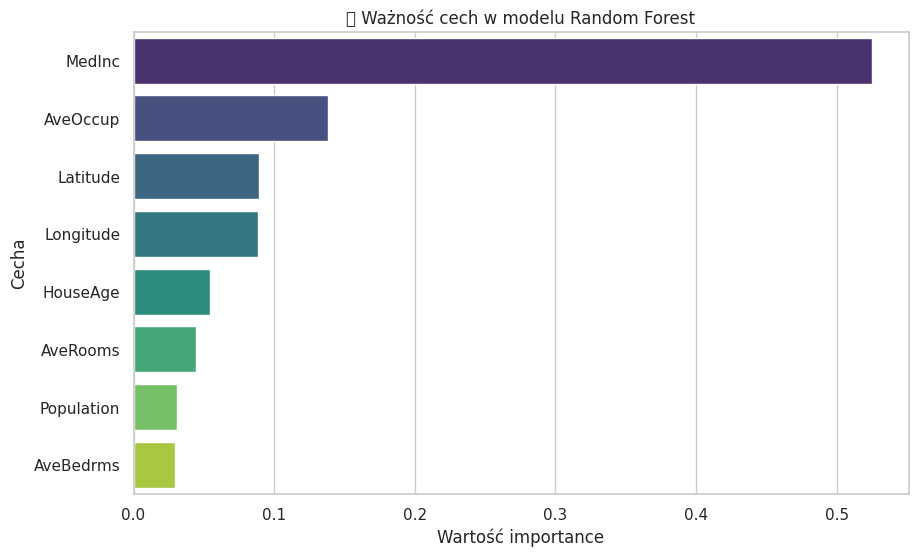

In [ ]:
# Feature importance z Random Forest
importances = rf.feature_importances_
features = X.columns

# Tworzymy DataFrame
feat_df = pd.DataFrame({'Cecha': features, 'Ważność': importances})
feat_df = feat_df.sort_values(by='Ważność', ascending=False)

# Wykres
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Ważność', y='Cecha', palette='viridis')
plt.title("🌲 Ważność cech w modelu Random Forest")
plt.xlabel("Wartość importance")
plt.ylabel("Cecha")
plt.show()


## 📉 Dodatkowe wizualizacje i zależności

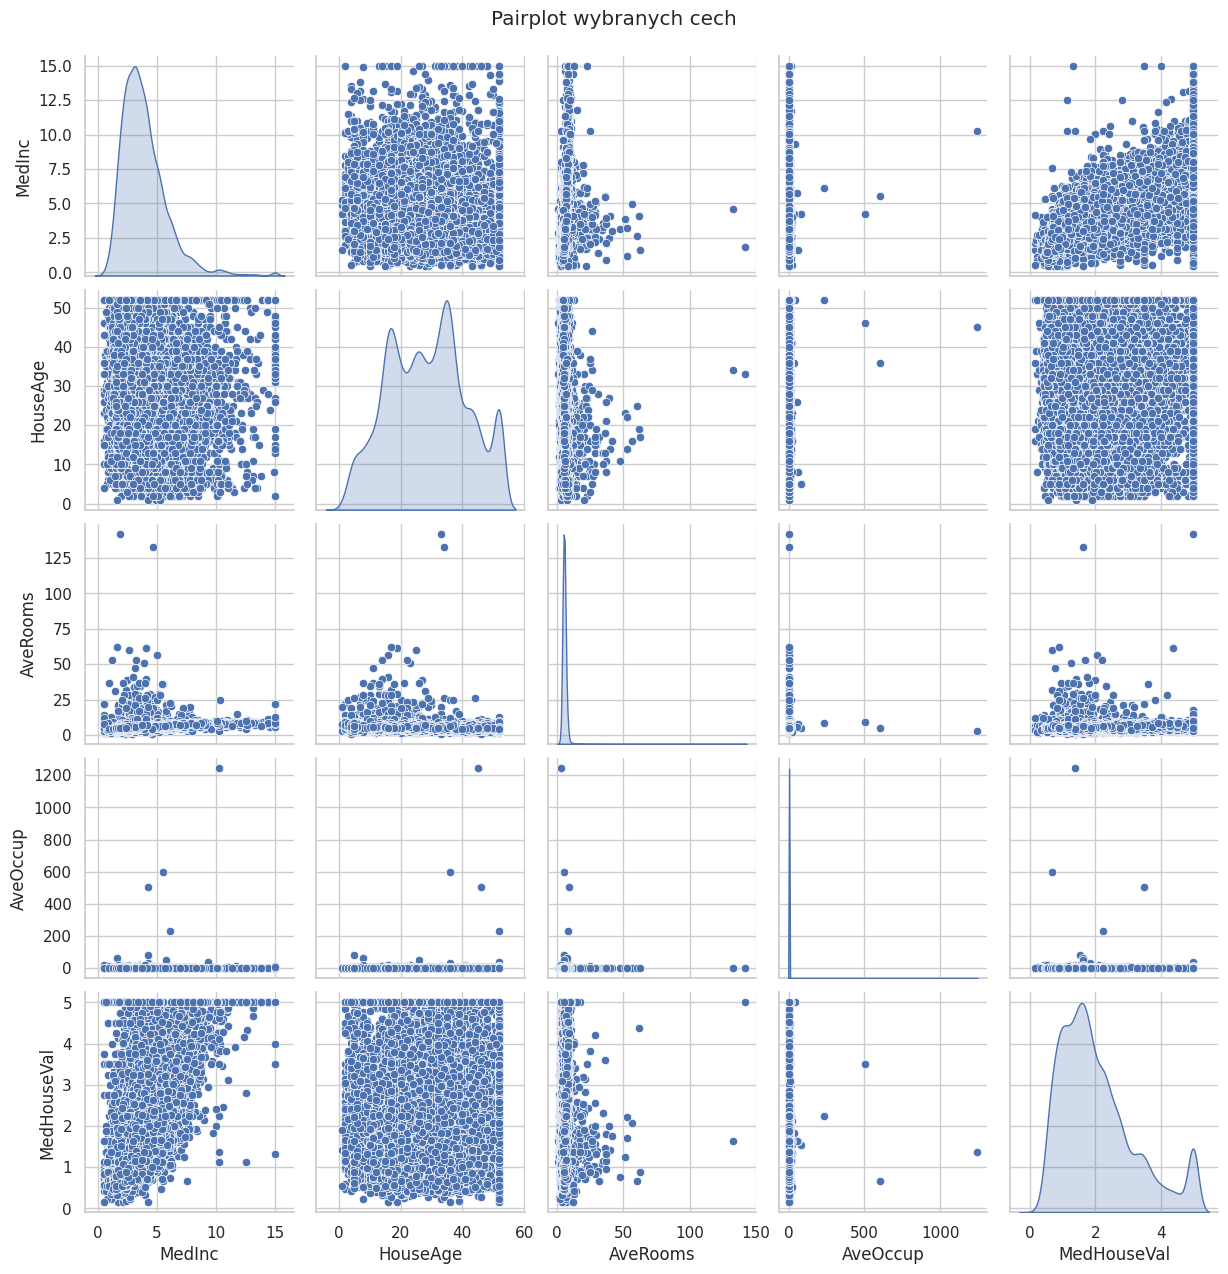

In [ ]:
selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'MedHouseVal']

sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle("Pairplot wybranych cech", y=1.02)
plt.show()


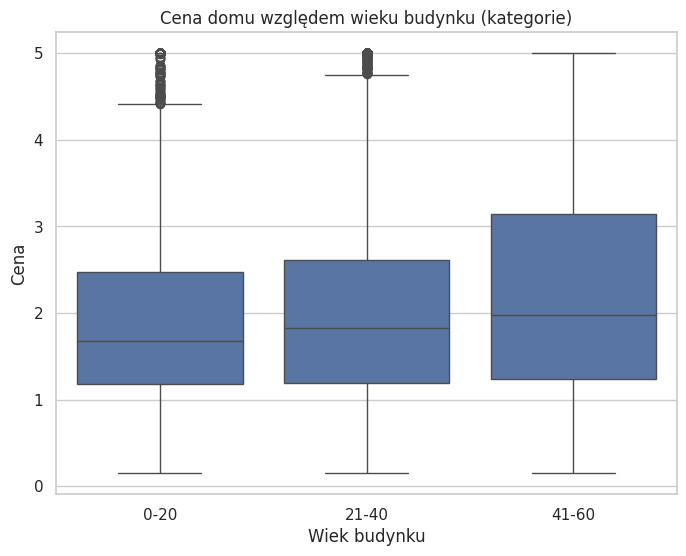

In [ ]:
# Tworzymy kategorie wieku
df['HouseAgeCat'] = pd.cut(df['HouseAge'], bins=[0, 20, 40, 60], labels=['0-20', '21-40', '41-60'])

plt.figure(figsize=(8, 6))
sns.boxplot(x='HouseAgeCat', y='MedHouseVal', data=df)
plt.title("Cena domu względem wieku budynku (kategorie)")
plt.xlabel("Wiek budynku")
plt.ylabel("Cena")
plt.show()


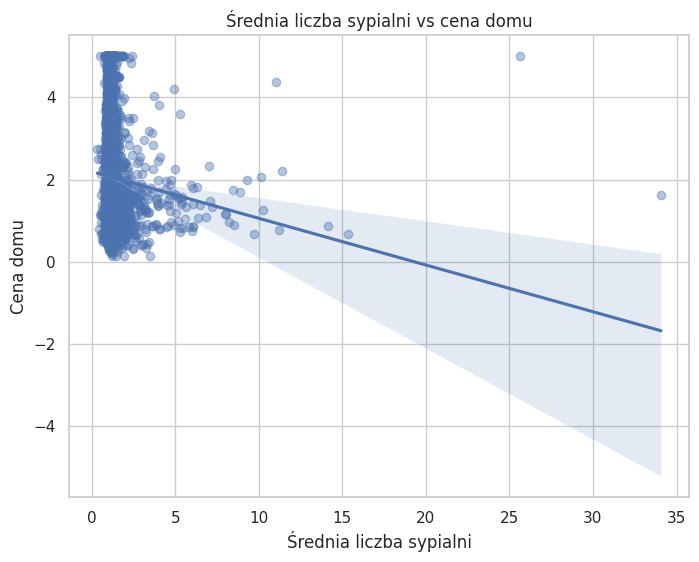

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='AveBedrms', y='MedHouseVal', data=df, scatter_kws={'alpha':0.4})
plt.title("Średnia liczba sypialni vs cena domu")
plt.xlabel("Średnia liczba sypialni")
plt.ylabel("Cena domu")
plt.show()
